# Conversión de `M4A` a `WAV`

## Code

In [ ]:
# Libreria
! pip install pydub
from pydub import AudioSegment # Audio

from google.colab import drive # Save file
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Definimos la función para convertir el archivo
def change(path, outName):
  sound = AudioSegment.from_file(path, format="m4a")
  return sound.export(outName, format="wav")

## Interactivo

In [ ]:
# Obtenemos la locación del archivo y lo convertimos
myPath = "/content/drive/MyDrive/Programming Land/Hacks/HackMorelos/muletillas.m4a"
change(myPath, "muletilla.wav")

<_io.BufferedRandom name='muletilla.wav'>

In [ ]:
# Exportando a Google Drive
!cp muletilla.wav "/content/drive/MyDrive/Programming Land/Hacks/HackMorelos/"
print("Done")

Done


# Voz a Texto

## Código

In [ ]:
# Librería
! pip install SpeechRecognition
import speech_recognition as sr # Reconocimiento de voz

# Inicializamos el identificador de voz
r = sr.Recognizer()

## Interactivo

In [ ]:
# Pedimos la ubicación del archivo WAV
path = "/content/drive/MyDrive/Programming Land/Hacks/HackMorelos/muletilla.wav"

# Cargamos el archivo de audio
myFile = sr.AudioFile(path)

In [ ]:
# Convertimos de *Audio* a *Texto*
with myFile as source:
  myAudio = r.record(source)
  audioText = r.recognize_google(myAudio, language="es-MX")
  print(audioText)

voy a hablar sobre este evento este fue una buena experiencia porque ah nunca antes había estado en un evento de este estilo este y siento que fue mucho mejor de lo que esperaba Y pues sí volvería a participar


# 1. Gráfica de las palabras del texto

**Divide las palabras**

In [ ]:
words = audioText.split()
print(words)

['voy', 'a', 'hablar', 'sobre', 'este', 'evento', 'este', 'fue', 'una', 'buena', 'experiencia', 'porque', 'ah', 'nunca', 'antes', 'había', 'estado', 'en', 'un', 'evento', 'de', 'este', 'estilo', 'este', 'y', 'siento', 'que', 'fue', 'mucho', 'mejor', 'de', 'lo', 'que', 'esperaba', 'Y', 'pues', 'sí', 'volvería', 'a', 'participar']


**Cuenta la frecuencia de las palabras**

In [ ]:
import collections

# Create a Counter object
word_counts = collections.Counter(words)

**Gráfica**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Keys and Values de Counter
keys = word_counts.keys()
values = word_counts.values()

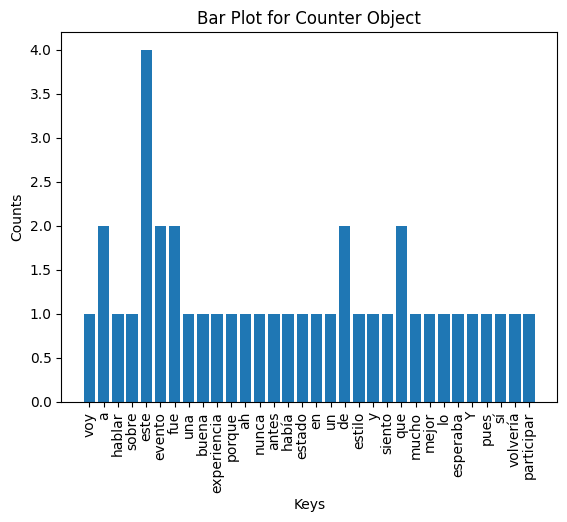

In [ ]:
plt.bar(keys, values)
plt.xticks(rotation=90)
plt.xlabel("Keys")
plt.ylabel("Counts")
plt.title("Bar Plot for Counter Object")
plt.show()

# 2. Sinónimos

## Código

**Instalando el SDK del modelo**

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.1/679.1 kB 9.4 MB/s eta 0:00:00


**Creando la API key en [Google AI Studio](https://aistudio.google.com/app/apikey)**

In [ ]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

**Iniciar el modelo**

In [ ]:
model = genai.GenerativeModel('gemini-pro')

## Interactivo

**Texto**

**AQuí**

In [ ]:
orderCount = word_counts.most_common()
aux=[]
for i in range(3):
  aux.append(orderCount[i][0])
mostMul = ', '.join(aux)
mostMul

'este, a, evento'

In [ ]:
myText = "Dame 3 sinónimos de las siguientes palabras: "+mostMul
myText

'Dame 3 sinónimos de las siguientes palabras: este, a, evento'

In [ ]:
response = model.generate_content(myText)
print(response.text)

**Este**
* Éste
* Esto
* El presente

**A**
* Hacia
* Con
* Para

**Evento**
* Acontecimiento
* Suceso
* Celebración


# 3. Comparar textos

## Interactivo

In [ ]:
basedText = "Hablar sobre la experiencia que tuviste en un evento dedicado de programación y sobre los conocimientos que adquiriste"

In [ ]:
text = "Dame ideas para mejorar este discurso:"+audioText+" para que cubra las siguientes ideas: "+basedText

In [ ]:
response = model.generate_content(text)
print(response.text)

**Ideas para Mejorar el Discurso**

**1. Introducción**

* Comienza con una anécdota personal cautivadora que ilustre tu inexperiencia previa con eventos de programación.
* Establece claramente el propósito de tu discurso: compartir tu experiencia y los conocimientos adquiridos en el evento.

**2. La Experiencia**

* Describe la atmósfera del evento y cómo te sentiste al llegar.
* Comparte detalles específicos de las charlas, talleres o actividades a las que asististe.
* Enfatiza los aspectos únicos y memorables del evento.

**3. Los Conocimientos Adquiridos**

* Explica qué nuevos conceptos o habilidades aprendiste durante el evento.
* Proporciona ejemplos concretos de cómo esta nueva información ha mejorado tus habilidades de programación.
* Discute cómo la experiencia ha ampliado tu perspectiva sobre el desarrollo de software.

**4. El Impacto**

* Describe cómo tu participación en el evento ha impactado tu carrera o desarrollo personal.
* Comparte cualquier proyecto o iniciativa qu

# 4. Calificación

## Interactivo

**Texto de la retroalimentacióm**

In [ ]:
retro = "En esta grabación tuve dificultad de expresar mis ideas, pero me gustó que hablé mucho mejor"

## Código

In [ ]:
from transformers import pipeline

classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

**Traduciendo**

*Librerías*

In [ ]:
! pip install transformers sentencepiece
from transformers import MarianMTModel, MarianTokenizer

*Obtengo el modelo*

In [ ]:
# Name of the model
model_name = "Helsinki-NLP/opus-mt-es-en"

# Declaring the model and tokenizer
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
if len(retro)>1024:
  print("Textlonger than the maximum sequence length of the model")
else:
  print("Your text is nice!")
  # Tokenizen the text
  inputs = tokenizer(retro, return_tensors="pt")

  # Translating
  outputs = model.generate(**inputs)

  # Decoding the translation
  translatedText = tokenizer.decode(outputs[0], skip_special_tokens=True)

  print("Text from Spanish to English ready")

Your text is nice!
Text from Spanish to English ready


In [ ]:
result = classifier(translatedText)
result

[{'label': 'POSITIVE', 'score': 0.9857813715934753}]

In [ ]:
print(f"Tu calificación es: {list(result[0].values())[1]*10:.3f}")

Tu calificación es: 9.858
